# Project Fletcher
#### Jacob Levine 5/19/18
First notebook for Project Fletcher. Gathering data.


In [103]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os
import re
import requests
from pandas.io.json import json_normalize
from pprint import pprint
import glob
import pickle
pd.set_option('max_rows', 200)

sns.set_style('darkgrid')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Gathering data for top 100 songs via billboardtop100.  
Years 1950 - 2015.

In [3]:
path = r'/Users/Jacob/billboard'
files = glob.glob(os.path.join(path, "*.csv"))
filelist = [f for f in files]
dfs = [pd.read_csv(f, engine='python').assign(Year=f) for f in filelist]
billboard_df = pd.concat(dfs, ignore_index=True)

In [4]:
billboard_df['Year'] = billboard_df.Year.replace(r'[^\d]','',regex=True)

In [6]:
billboard_df.columns

Index(['Artist', 'Position', 'Position�', 'Song Title', 'Year'], dtype='object')

In [41]:
billboard_df.rename(columns={billboard_df.columns[2]: "Position2"}, inplace=True)

In [42]:
billboard_df.shape

(6180, 5)

In [43]:
billboard_df.columns

Index(['Artist', 'Position', 'Position2', 'Song Title', 'Year'], dtype='object')

In [57]:
billboard_df.fillna(value=0, inplace=True)

In [59]:
billboard_df['position'] = billboard_df.Position + billboard_df.Position2

In [61]:
billboard_df.drop(['Position', 'Position2'], axis=1, inplace=True)

In [63]:
billboard_df.isnull().sum()

Artist        0
Song Title    0
Year          0
position      0
dtype: int64

In [64]:
billboard_df['Year'] = billboard_df.Year.astype('int64')

In [65]:
billboard_df = billboard_df[['position', 'Song Title', 'Artist', 'Year']]

In [1]:
#billboard_df

In [68]:
#Histogram of artists
hits = billboard_df.Artist.value_counts()

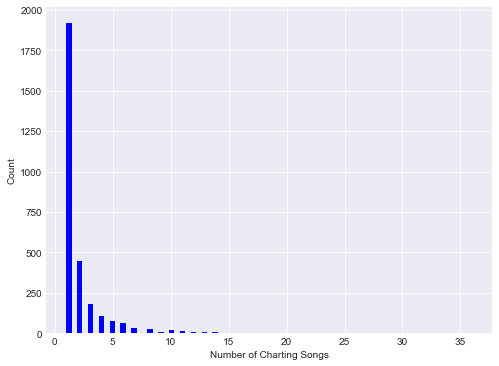

In [69]:
figsize(8, 6)
xlabel("Number of Charting Songs")
ylabel("Count")
hist(hits.values, bins=75, color='b');

In [99]:
pd.set_option('max_rows', 200)

In [2]:
# artist_groups = billboard_df.groupby(['Artist', 'position', 'Year']).count()

In [3]:
# billboard_df[billboard_df['Artist'].str.contains('Kendrick Lamar', regex=True)]

In [104]:
#Pickling
with open("billboard.pkl", "wb") as f:
    pickle.dump(billboard_df, f)

In [105]:
#Testing opening pickled model 
with open("billboard.pkl", "rb") as f:
    billboard_df = pickle.load(f)